In [50]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
#import dataframe
df=pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")

In [36]:
df.head(5)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [25]:
df.isnull().values.any()

False

**Code for answers to question 14-16**

In [57]:
#convert column to datetime
df['FullDate']= pd.to_datetime(df['FullDate'])
#df["FullDate"] = pd.to_datetime(df["FullDate"]) 
df.set_index("FullDate", inplace=True)

In [58]:
#split train and test data
df_daily = df.resample("D").sum()
Train_df = df[:2757]
Test_df = df[2757:]

In [71]:
Train_df_r = Train_df.reset_index()
Train_df_r.head()

,FullDate,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [72]:
#rename columns to "ds" and "y" respectively
Train_df_r = Train_df_r.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
Train_df_r.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [73]:
#training an univariate time series model using Facebook Prophet
from fbprophet import Prophet
model = Prophet()
model.fit(Train_df_r)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


**Code for answers to question 17-19**

In [74]:
#rename columns to "ds" and "y" respectively
Train_df_rf = Train_df_r.rename(columns={"FullDate": "ds", "SysLoad": "add1", "Tmax": "add2", "GasPrice": "add3" })
Train_df_rf.head()

,ds,add2,add1,add3,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [75]:
#training an univariate time series model using Facebook Prophet
from fbprophet import Prophet
model = Prophet()
model.fit(Train_df_rf)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


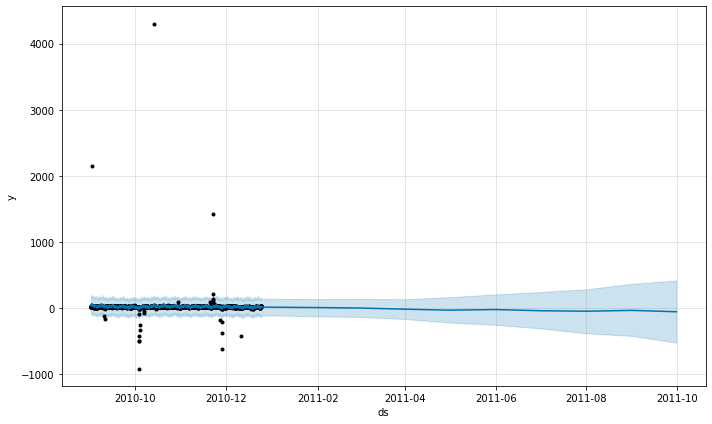

In [76]:
#predict for the next 10 months
future = model.make_future_dataframe(periods=10, freq='M')
forecast = model.predict(future)
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
model.plot(forecast)
plt.show()

In [78]:
df_daily = df.resample('D').sum()

Text(0, 0.5, 'Passengers')

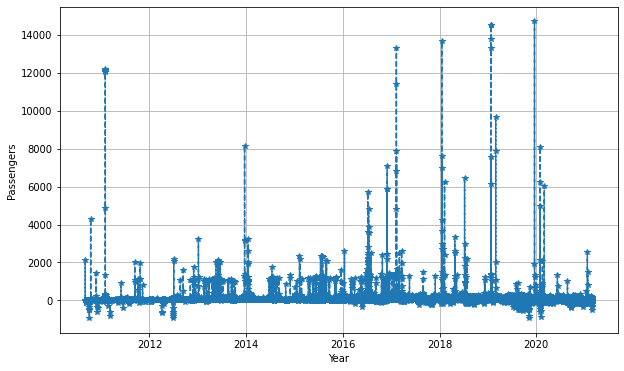

In [79]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.ElecPrice, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [83]:
def MAPE(Test_df):
  a = Test_df,
  print(a)
  return a 
MAPE(Test_df)

(                     Tmax     SysLoad  GasPrice  ElecPrice
FullDate                                                  
2010-12-24 21:00:00  33.3  1513.57905    3.0988     24.870
2010-12-24 22:00:00  33.3  1341.05455    3.0988     22.820
2010-12-24 23:00:00  33.3  1135.43285    3.0988     21.185
2010-12-25 00:00:00  31.7  1169.16690    3.0988     20.120
2010-12-25 01:00:00  31.7  1209.20920    3.0988     18.065
...                   ...         ...       ...        ...
2021-02-28 19:00:00  24.3   449.63625    5.4848    117.925
2021-02-28 20:00:00  24.3   815.59975    5.4848     87.880
2021-02-28 21:00:00  24.3   745.12325    5.4848     62.060
2021-02-28 22:00:00  24.3   694.95150    5.4848     62.000
2021-02-28 23:00:00  24.3   714.69630    5.4848     62.955

[89259 rows x 4 columns],)


(                     Tmax     SysLoad  GasPrice  ElecPrice
 FullDate                                                  
 2010-12-24 21:00:00  33.3  1513.57905    3.0988     24.870
 2010-12-24 22:00:00  33.3  1341.05455    3.0988     22.820
 2010-12-24 23:00:00  33.3  1135.43285    3.0988     21.185
 2010-12-25 00:00:00  31.7  1169.16690    3.0988     20.120
 2010-12-25 01:00:00  31.7  1209.20920    3.0988     18.065
 ...                   ...         ...       ...        ...
 2021-02-28 19:00:00  24.3   449.63625    5.4848    117.925
 2021-02-28 20:00:00  24.3   815.59975    5.4848     87.880
 2021-02-28 21:00:00  24.3   745.12325    5.4848     62.060
 2021-02-28 22:00:00  24.3   694.95150    5.4848     62.000
 2021-02-28 23:00:00  24.3   714.69630    5.4848     62.955
 
 [89259 rows x 4 columns],)

**Code of Question no 20**

In [84]:
#rename columns to "ds" and "y" respectively
Train_df_rf = Train_df_r.rename(columns={"FullDate": "ds", "SysLoad": "add1", "GasPrice": "add3" })
Train_df_rf.head()

,ds,Tmax,add1,add3,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [85]:
#training an univariate time series model using Facebook Prophet
from fbprophet import Prophet
model = Prophet()
model.fit(Train_df_rf)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
